In [1]:
from artist_data import ArtistData
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from collections import Counter

# Loading artist dict to data frame

In [2]:
depth = 5
data = ArtistData('Giuseppe Verdi', depth=depth)
data.load_data()
df = pd.DataFrame.from_dict(data.artists, orient='index')
df

,id,name,popularity,followers,genres,depth
1JOQXgYdQV2yfrhewqx96o,1JOQXgYdQV2yfrhewqx96o,Giuseppe Verdi,64,326695,"[classical, italian opera, late romantic era]",0
0OzxPXyowUEQ532c9AmHUR,0OzxPXyowUEQ532c9AmHUR,Giacomo Puccini,65,222176,"[classical, italian opera, post-romantic era]",1
2D7RkvtKKb6E5UmbjQM1Jd,2D7RkvtKKb6E5UmbjQM1Jd,Georges Bizet,59,124928,"[classical, french opera, late romantic era]",1
5ihY290YPGc3aY2xTyx7Gy,5ihY290YPGc3aY2xTyx7Gy,Edvard Grieg,65,254129,"[classical, late romantic era, norwegian class...",1
17hR0sYHpx7VYTMRfFUOmY,17hR0sYHpx7VYTMRfFUOmY,Maurice Ravel,62,248661,"[classical, early modern classical, post-roman...",1
...,...,...,...,...,...,...
5qUyUS9vNS4ei4hm7ysj8W,5qUyUS9vNS4ei4hm7ysj8W,Bill Thompson,38,580,"[disney, movie tunes]",5
4L26KugcKxFLhnDRtubUwh,4L26KugcKxFLhnDRtubUwh,Richard Haydn,17,203,[movie tunes],5
7oavKrnYbTZPAPq7zCuipM,7oavKrnYbTZPAPq7zCuipM,Paige O'Hara,57,6698,[movie tunes],5
5sy77gt4bfsLcSQ8GIe4ZZ,5sy77gt4bfsLcSQ8GIe4ZZ,Alan Menken,67,66938,"[broadway, disney, hollywood, movie tunes]",5


# Overall analysis


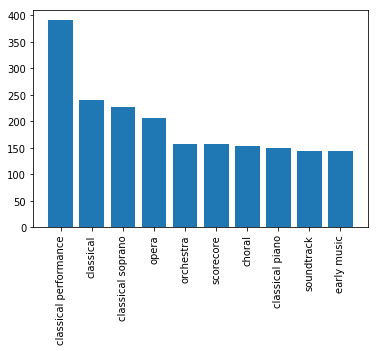

In [3]:
genres = df.explode('genres')['genres'].fillna('nan')
counter = Counter(genres)
counter = [(key, item) for key, item in sorted(counter.items(), key=lambda x: x[1], reverse=True) if key != 'nan']

genres_limit = 10
counter = counter[0:genres_limit]
keys, values = zip(*counter)

plt.bar(x=keys, height=values)
plt.xticks(rotation=90)
plt.show()

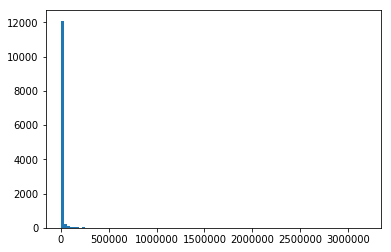

In [4]:
followers = np.array(df['followers'])
plt.hist(followers, bins=100)
plt.show()

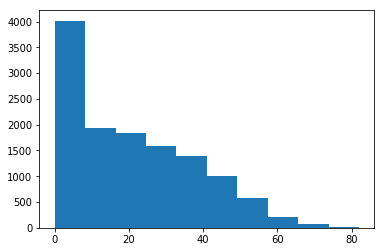

In [5]:
popularity = np.array(df['popularity'])
plt.hist(popularity)
plt.show()

#  Slicing

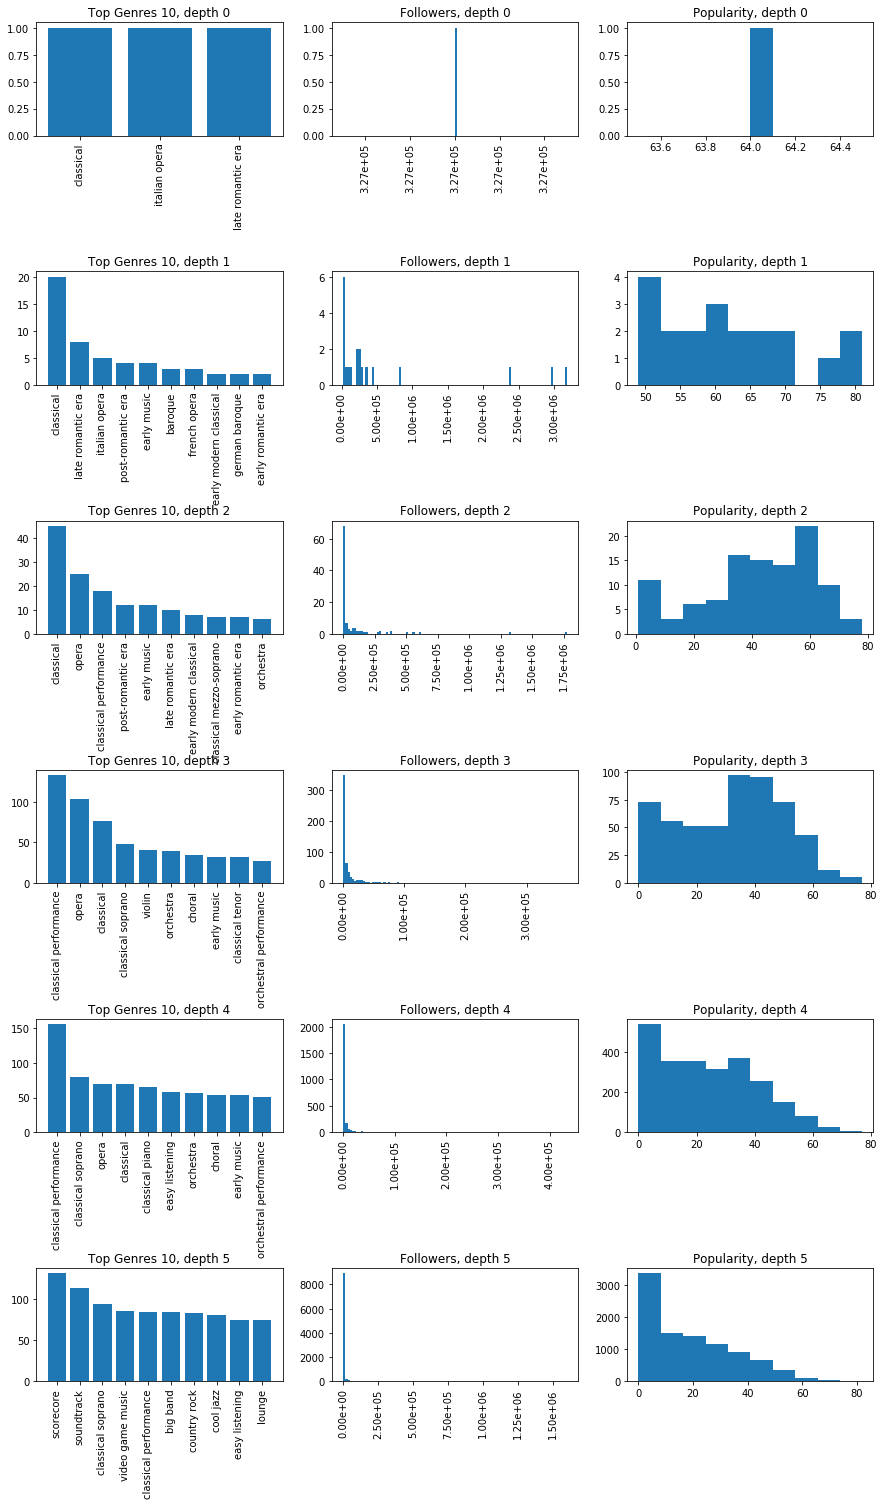

In [6]:
fig, axs = plt.subplots(depth + 1,3, figsize=(15, 25), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace=1.2, wspace=.2)
axs = axs.ravel()

for i in range(depth + 1):
    df_depth = df[df['depth'] == i]
    genres = df_depth.explode('genres')['genres'].fillna('nan')
    counter = Counter(genres)
    counter = [(key, item) for key, item in sorted(counter.items(), key=lambda x: x[1], reverse=True) if key != 'nan']

    limit = 10
    counter = counter[0:limit]
    keys, values = zip(*counter)
    axs[i * 3].bar(x=keys, height=values)
    axs[i * 3].set_title(f'Top Genres {genres_limit}, depth {i}')
    plt.setp(axs[i * 3].get_xticklabels(), rotation=90)
    
    followers = np.array(df_depth["followers"])
    axs[1 + i * 3].hist(followers, bins=100)
    axs[1 + i * 3].get_xaxis().set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    axs[1 + i * 3].set_title(f'Followers, depth {i}')
    plt.setp(axs[1 + i * 3].get_xticklabels(), rotation=90)
    
    popularity = np.array(df_depth["popularity"])
    axs[2 + i * 3].hist(popularity)
    axs[2 + i * 3].set_title(f'Popularity, depth {i}')
    